# Вишинська Наталія, група ОІ-21сп, варіант 3, ЛР №3.2
## Опис даних:
### Набір даних складається з наступних стовпців:
- Type – тип тварини (1 – собака, 2 – кіт)
- Name – ім'я тварини
- Age – вік у місяцях
- Gender – стать тварини (1 – чоловіча, 2 – жіноча, 3 – невідома)
- MaturitySize – розмір дорослої особини (1 – маленька, 2 – середня, 3 – велика, 4 – дуже велика)
- FurLength – довжина шерсті (1 – коротка, 2 – середня, 3 – довга)
- Vaccinated – чи вакцинована тварина (1 – так, 2 – ні, 3 – невідомо)
- Dewormed – чи проглистована тварина
- Sterilized – чи стерилізована тварина
- Health – стан здоров'я (1 – здоровий, 2 – незначні проблеми, 3 – серйозні проблеми)
- AdoptionSpeed – швидкість усиновлення (0 – в день публікації, 1 – за тиждень, 2 – до місяця, 3 – після місяця, 4 – не був усиновлений)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.simplefilter('ignore')

In [4]:
# Зчитування даних
ds = pd.read_csv("./new_dataset.csv")

# Відновлюємо масштабовані значення 'AdoptionSpeed'
ds['AdoptionSpeed'] = (ds['AdoptionSpeed'] * 4).round().astype(int)

# Modelling and Validation

In [6]:
y_column = ['AdoptionSpeed']  # Швидкість усиновлення тваринки

# Визначення ознак
X_columns = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State']

X = ds[X_columns] # Ознаки
y = ds[y_column] # Цільова змінна

### Train-Valid-Test
Метод розподілу даних на тренувальний, валідаційний та тестовий набори використовується для оцінки продуктивності моделі.
- **Тренувальний набір** використовується для навчання моделі.
- **Валідаційний набір** служить для налаштування гіперпараметрів та вибору найкращої моделі.
- **Тестовий набір** використовується для остаточної оцінки продуктивності моделі на нових, невідомих даних.

Цей метод допомагає запобігти перенавчанню, оскільки модель оцінюється на даних, які вона не бачила під час навчання.

In [8]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(1084, 9)
(1084, 1)
(136, 9)
(136, 1)
(136, 9)
(136, 1)


In [9]:
import pandas as pd
from typing import Tuple, Any

def process_pet_data(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    # Видалити непотрібні стовпці
    columns_to_drop = ['Unnamed: 0', 'PetID', 'RescuerID', 'Description', 'ColorName_x', 'ColorName_y']
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

    # Заповнити пропущені значення відповідними стратегіями
    df_cleaned.fillna({
        'Age': df_cleaned['Age'].mean(),
        'FurLength': df_cleaned['FurLength'].mode()[0],
        'Vaccinated': 0.0,
        'Dewormed': 0.0,
        'Sterilized': 0.0,
        'Health': df_cleaned['Health'].mode()[0],
        'Quantity': 1,
        'Fee': df_cleaned['Fee'].mean(),
        'VideoAmt': 0.0,
        'PhotoAmt': df_cleaned['PhotoAmt'].mean()
    }, inplace=True)

    # Створити підсумковий DataFrame
    summary_df = df_cleaned.describe(include='all')

    return df_cleaned, summary_df

In [10]:
models = {'RandomForestClassifier': RandomForestClassifier(), 'LogisticRegression': LogisticRegression(), 'GaussianNB': GaussianNB()}

Training RandomForestClassifier
Test set metrics:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.11      0.18      0.14        22
           2       0.23      0.29      0.25        35
           3       0.35      0.21      0.26        39
           4       0.29      0.25      0.27        36

    accuracy                           0.24       136
   macro avg       0.30      0.23      0.25       136
weighted avg       0.27      0.24      0.24       136

Validation set metrics:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.20      0.23      0.21        26
           2       0.30      0.20      0.24        44
           3       0.21      0.21      0.21        24
           4       0.28      0.37      0.32        38

    accuracy                           0.25       136
   macro avg       0.20      0.20      0.20       136
w

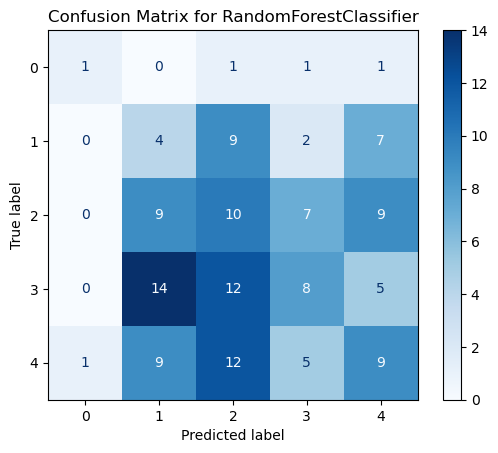

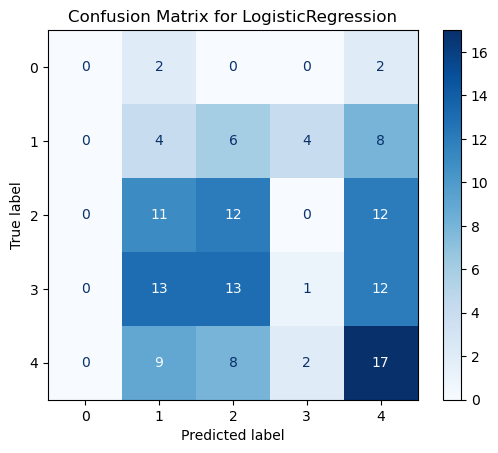

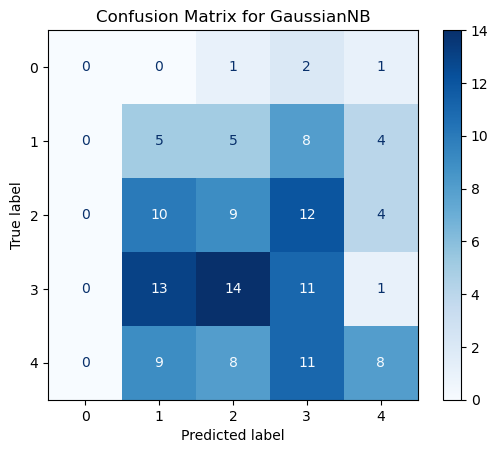

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
classifiers = dict()
for name, model in models.items():
    print('Training', name)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Test set metrics:\n', metrics.classification_report(y_test, y_pred))
    
    y_pred_valid = model.predict(X_valid)
    print('Validation set metrics:\n', metrics.classification_report(y_valid, y_pred_valid))
    
    # Виведення матриці плутанини
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix for {name}')
    
    classifiers[name] = model

# K-fold validation
У цьому методі дані діляться на K частин (складових). Процес навчання і тестування моделі виглядає наступним чином:
- Модель навчається на K-1 частинах даних.
- Тестується на одній частині.
Цей процес повторюється K раз, поки кожна частина не буде використана як тестовий набір. Це дозволяє отримати більш стабільну оцінку продуктивності моделі.


Evaluating RandomForestClassifier:
k-fold metrics for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.27      0.17      0.21        52
           2       0.27      0.42      0.33        53
           3       0.19      0.13      0.16        45
           4       0.23      0.26      0.24        58

    accuracy                           0.24       217
   macro avg       0.23      0.22      0.22       217
weighted avg       0.24      0.24      0.23       217

k-fold metrics for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.39      0.24      0.29        51
           2       0.19      0.27      0.22        52
           3       0.20      0.24      0.22        46
           4       0.40      0.40      0.40        58

    accuracy                           0.28       217
   macro 

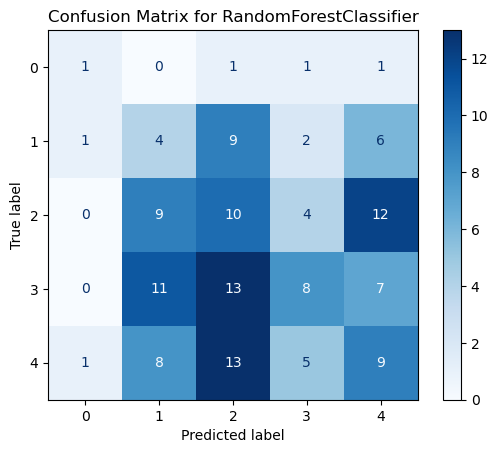


Test set metrics for LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.10      0.18      0.13        22
           2       0.31      0.34      0.32        35
           3       0.14      0.03      0.04        39
           4       0.33      0.47      0.39        36

    accuracy                           0.25       136
   macro avg       0.18      0.20      0.18       136
weighted avg       0.22      0.25      0.22       136



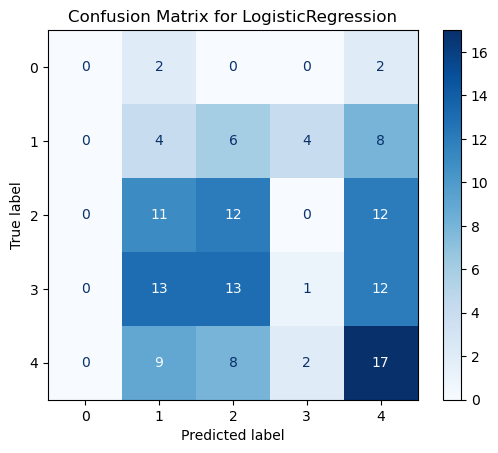


Test set metrics for GaussianNB:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.14      0.23      0.17        22
           2       0.24      0.26      0.25        35
           3       0.25      0.28      0.27        39
           4       0.44      0.22      0.30        36

    accuracy                           0.24       136
   macro avg       0.21      0.20      0.20       136
weighted avg       0.27      0.24      0.25       136



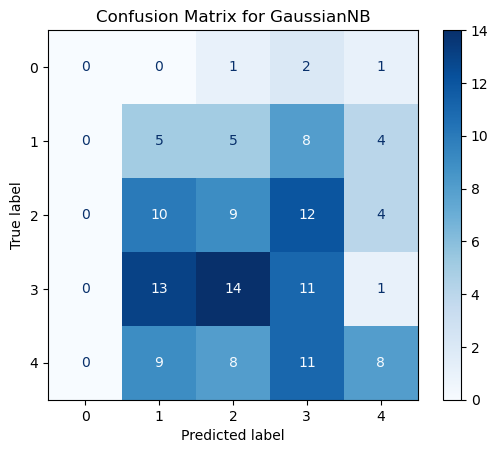

In [13]:
from sklearn.model_selection import KFold, train_test_split
from numpy import array
from sklearn import metrics

# prepare cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# training and evaluation for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")
    for train_idx, test_idx in kfold.split(X_train):
        # train the model on the k-fold split
        model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        
        # predict and evaluate on the test part of the fold
        y_pred_fold = model.predict(X_train.iloc[test_idx])
        print(f'k-fold metrics for {model_name}:')
        print(metrics.classification_report(y_train.iloc[test_idx], y_pred_fold))
    
    # predict and evaluate on the validation set
    y_pred_test = model.predict(X_valid)  # Заміна X_val на X_valid
    print(f'\nValidation set metrics for {model_name}:')
    print(metrics.classification_report(y_valid, y_pred_test))  # Заміна y_val на y_valid

# final evaluation on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_final = model.predict(X_test)
    print(f'\nTest set metrics for {model_name}:')
    print(metrics.classification_report(y_test, y_pred_final))
 # Display confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, y_pred_final)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')
    plt.show()

# Leave-One-Out cross-validator
Цей метод є спеціальним випадком K-Fold, де K дорівнює загальній кількості екземплярів у наборі даних. 
- Кожен екземпляр використовується як тестовий, а всі інші — для навчання.
Цей метод є обчислювально дорогим, але дає точні результати, особливо для малих наборів даних.


Test set metrics for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.04      0.05      0.04        22
           2       0.23      0.29      0.25        35
           3       0.33      0.15      0.21        39
           4       0.25      0.31      0.28        36

    accuracy                           0.21       136
   macro avg       0.24      0.21      0.21       136
weighted avg       0.24      0.21      0.21       136



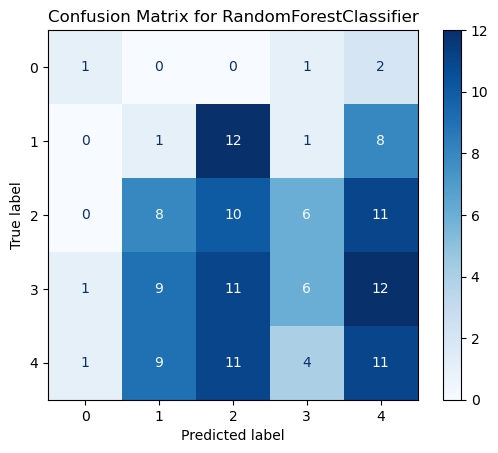


Test set metrics for LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.10      0.18      0.13        22
           2       0.31      0.34      0.32        35
           3       0.14      0.03      0.04        39
           4       0.33      0.47      0.39        36

    accuracy                           0.25       136
   macro avg       0.18      0.20      0.18       136
weighted avg       0.22      0.25      0.22       136



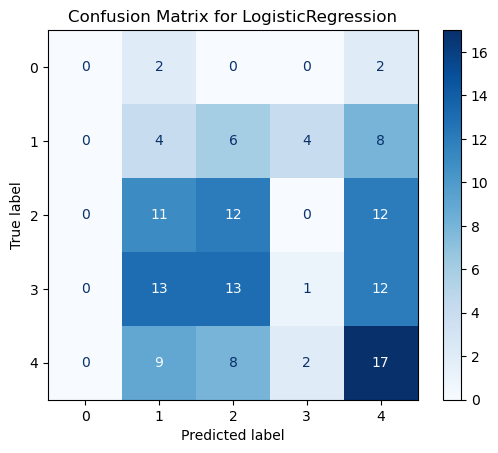


Test set metrics for GaussianNB:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.14      0.23      0.17        22
           2       0.24      0.26      0.25        35
           3       0.25      0.28      0.27        39
           4       0.44      0.22      0.30        36

    accuracy                           0.24       136
   macro avg       0.21      0.20      0.20       136
weighted avg       0.27      0.24      0.25       136



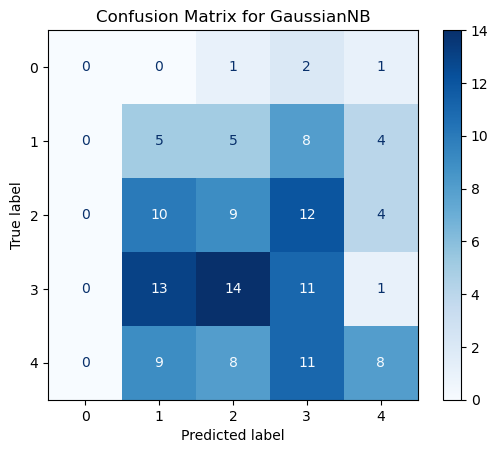

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_final = model.predict(X_test)
    print(f'\nTest set metrics for {model_name}:')
    print(metrics.classification_report(y_test, y_pred_final))

    conf_matrix = metrics.confusion_matrix(y_test, y_pred_final)

    display_labels = model.classes_ if hasattr(model, "classes_") else sorted(y_test.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')
    plt.show()


# Random permutations cross-validation
Цей метод оцінює продуктивність моделі через випадкові перестановки даних.
- Дані випадковим чином перемішуються, і потім на основі цього перемішування створюються тренувальні та тестові набори.
- Процес повторюється кілька разів, що дозволяє отримати статистично значущі результати.

Цей метод допомагає уникнути упереджень, пов'язаних з порядком даних, але може вимагати значних обчислювальних ресурсів, особливо при великих наборах даних.


Evaluating model: RandomForestClassifier
K-fold set 1 metrics:
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.16      0.17      0.17        54
           2       0.24      0.27      0.26        62
           3       0.22      0.25      0.24        64
           4       0.31      0.27      0.29        81

    accuracy                           0.24       272
   macro avg       0.25      0.21      0.22       272
weighted avg       0.24      0.24      0.24       272



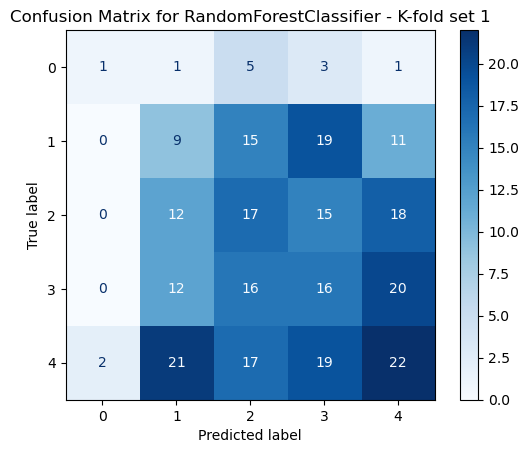

K-fold set 2 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.21      0.17      0.19        60
           2       0.25      0.29      0.27        69
           3       0.26      0.27      0.27        62
           4       0.35      0.35      0.35        75

    accuracy                           0.27       272
   macro avg       0.21      0.22      0.21       272
weighted avg       0.27      0.27      0.27       272



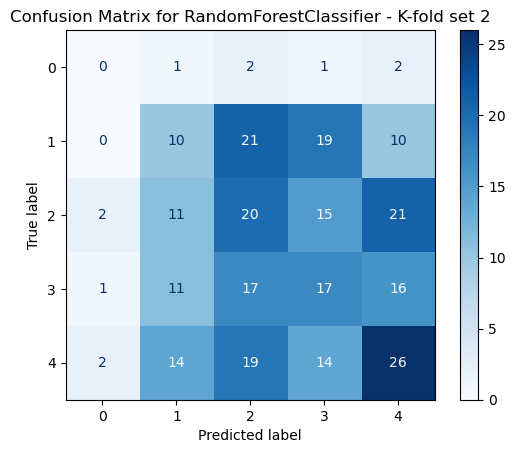

K-fold set 3 metrics:
              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.30      0.35      0.32        57
           2       0.26      0.33      0.29        70
           3       0.24      0.21      0.23        56
           4       0.39      0.28      0.32        83

    accuracy                           0.29       272
   macro avg       0.27      0.27      0.26       272
weighted avg       0.30      0.29      0.29       272



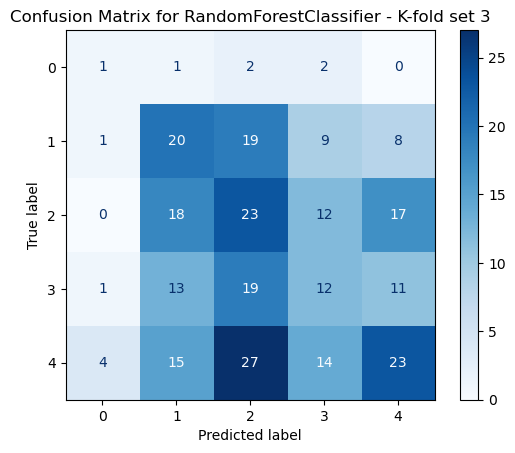

K-fold set 4 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.21      0.22      0.22        58
           2       0.23      0.28      0.25        72
           3       0.25      0.35      0.29        51
           4       0.39      0.24      0.30        78

    accuracy                           0.26       272
   macro avg       0.21      0.22      0.21       272
weighted avg       0.26      0.26      0.25       272



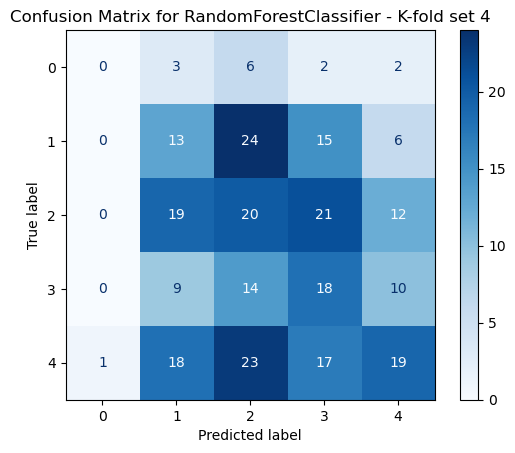

K-fold set 5 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.18      0.21      0.19        52
           2       0.28      0.33      0.30        69
           3       0.22      0.25      0.23        57
           4       0.43      0.32      0.36        82

    accuracy                           0.27       272
   macro avg       0.22      0.22      0.22       272
weighted avg       0.28      0.27      0.27       272



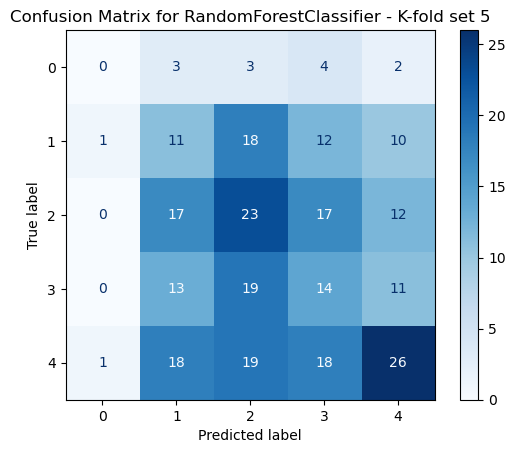


Evaluating model: LogisticRegression
K-fold set 1 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.24      0.17      0.20        54
           2       0.23      0.39      0.29        62
           3       0.00      0.00      0.00        64
           4       0.32      0.51      0.39        81

    accuracy                           0.27       272
   macro avg       0.16      0.21      0.17       272
weighted avg       0.19      0.27      0.22       272



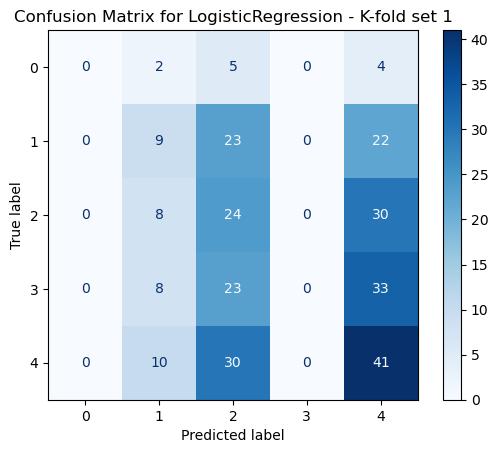

K-fold set 2 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.28      0.28      0.28        60
           2       0.29      0.29      0.29        69
           3       0.00      0.00      0.00        62
           4       0.28      0.53      0.37        75

    accuracy                           0.28       272
   macro avg       0.17      0.22      0.19       272
weighted avg       0.21      0.28      0.24       272



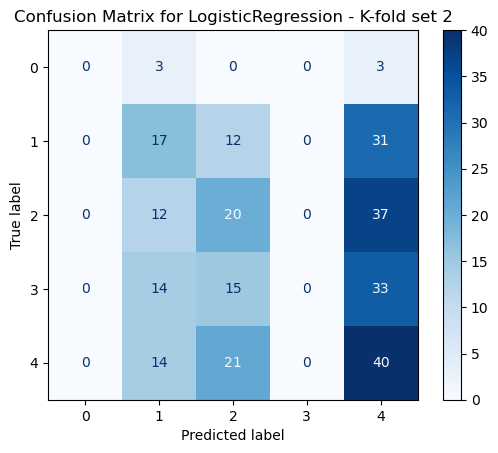

K-fold set 3 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.32      0.25      0.28        57
           2       0.19      0.26      0.22        70
           3       0.19      0.11      0.14        56
           4       0.39      0.48      0.43        83

    accuracy                           0.29       272
   macro avg       0.22      0.22      0.21       272
weighted avg       0.27      0.29      0.27       272



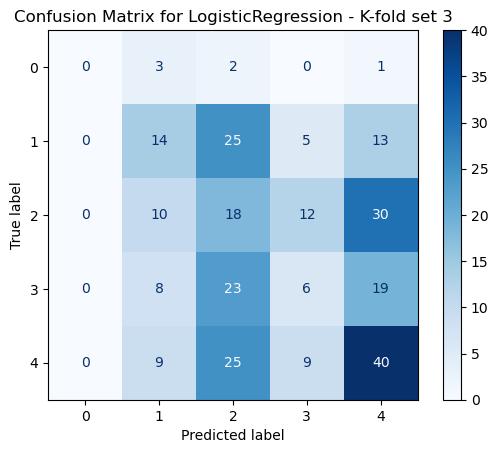

K-fold set 4 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.30      0.24      0.27        58
           2       0.22      0.24      0.23        72
           3       0.17      0.02      0.04        51
           4       0.30      0.55      0.39        78

    accuracy                           0.28       272
   macro avg       0.20      0.21      0.18       272
weighted avg       0.24      0.28      0.24       272



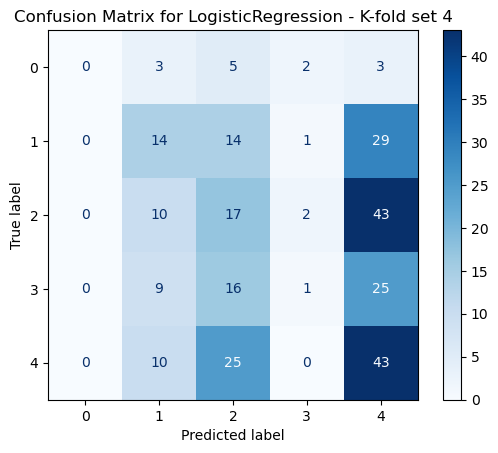

K-fold set 5 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.18      0.23      0.20        52
           2       0.23      0.22      0.22        69
           3       0.20      0.16      0.18        57
           4       0.41      0.48      0.44        82

    accuracy                           0.28       272
   macro avg       0.20      0.22      0.21       272
weighted avg       0.26      0.28      0.26       272



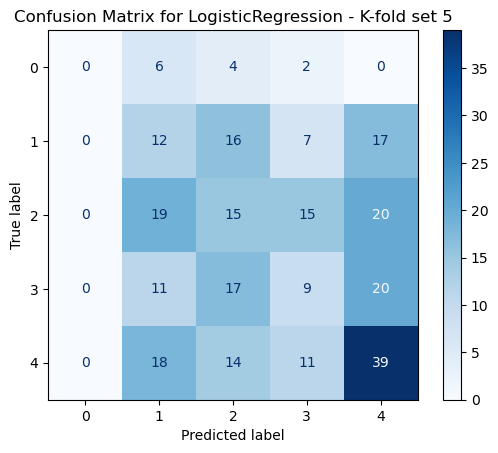


Evaluating model: GaussianNB
K-fold set 1 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.23      0.19      0.21        54
           2       0.28      0.32      0.30        62
           3       0.24      0.25      0.25        64
           4       0.31      0.35      0.33        81

    accuracy                           0.27       272
   macro avg       0.21      0.22      0.22       272
weighted avg       0.26      0.27      0.26       272



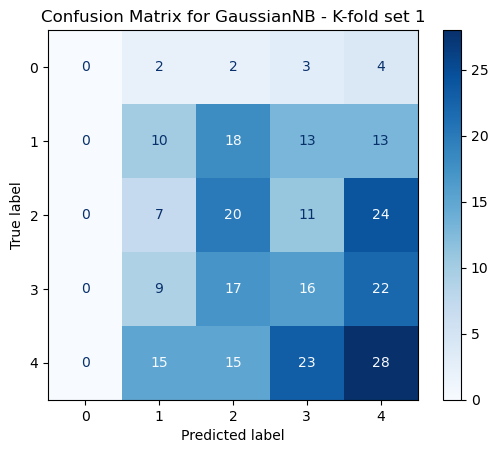

K-fold set 2 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.24      0.23      0.24        60
           2       0.25      0.29      0.27        69
           3       0.26      0.15      0.19        62
           4       0.33      0.43      0.37        75

    accuracy                           0.28       272
   macro avg       0.21      0.22      0.21       272
weighted avg       0.26      0.28      0.26       272



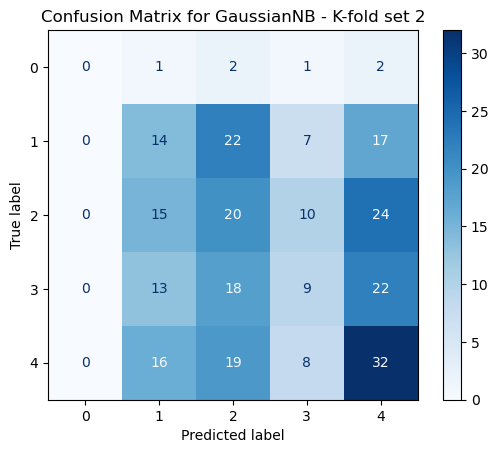

K-fold set 3 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.35      0.23      0.28        57
           2       0.23      0.29      0.26        70
           3       0.18      0.27      0.22        56
           4       0.30      0.24      0.27        83

    accuracy                           0.25       272
   macro avg       0.21      0.20      0.20       272
weighted avg       0.26      0.25      0.25       272



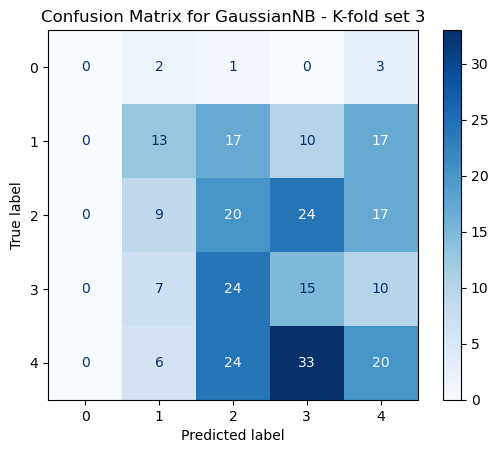

K-fold set 4 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.27      0.22      0.25        58
           2       0.24      0.35      0.29        72
           3       0.25      0.14      0.18        51
           4       0.34      0.41      0.37        78

    accuracy                           0.28       272
   macro avg       0.22      0.22      0.22       272
weighted avg       0.27      0.28      0.27       272



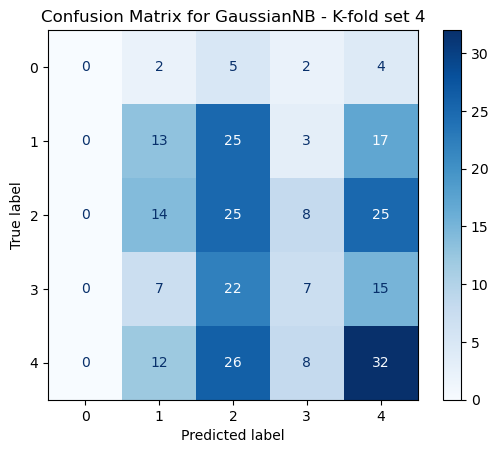

K-fold set 5 metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.23      0.31      0.26        52
           2       0.30      0.38      0.33        69
           3       0.17      0.25      0.20        57
           4       0.40      0.17      0.24        82

    accuracy                           0.26       272
   macro avg       0.22      0.22      0.21       272
weighted avg       0.28      0.26      0.25       272



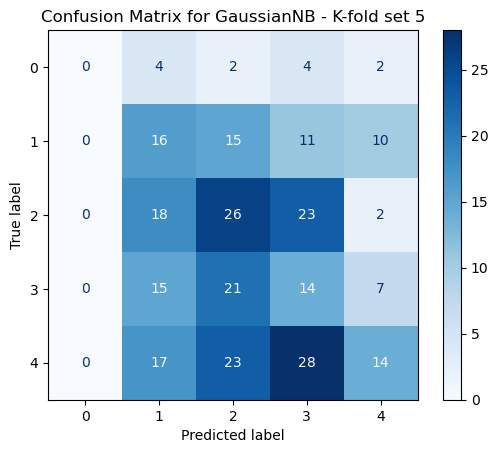

In [17]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Цикл по кожній моделі
for model_name, model in models.items():
    print(f'\nEvaluating model: {model_name}')
    
    for i, (train_index, test_index) in enumerate(ss.split(X), start=1):
        # Навчання моделі
        model.fit(X.iloc[train_index], y.iloc[train_index])
        y_pred = model.predict(X.iloc[test_index])
        
        # Виведення метрик
        print(f'K-fold set {i} metrics:')
        print(classification_report(y.iloc[test_index], y_pred))
        
        # Виведення матриці плутанини
        conf_matrix = confusion_matrix(y.iloc[test_index], y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name} - K-fold set {i}')
        plt.show()


In [18]:
import pandas as pd

# Створимо словник для зберігання метрик
metrics = {
    'RandomForestClassifier': {
        'K-fold set 1': {'precision': [0.33, 0.23, 0.25, 0.25, 0.29], 'recall': [0.09, 0.24, 0.26, 0.30, 0.25], 'f1-score': [0.14, 0.23, 0.25, 0.27, 0.26]},
        'K-fold set 2': {'precision': [0.00, 0.24, 0.24, 0.25, 0.33], 'recall': [0.00, 0.23, 0.22, 0.24, 0.37], 'f1-score': [0.00, 0.24, 0.23, 0.25, 0.35]},
        'K-fold set 3': {'precision': [0.10, 0.28, 0.26, 0.25, 0.35], 'recall': [0.17, 0.30, 0.36, 0.23, 0.22], 'f1-score': [0.12, 0.29, 0.30, 0.24, 0.27]},
        'K-fold set 4': {'precision': [0.00, 0.22, 0.24, 0.26, 0.37], 'recall': [0.00, 0.21, 0.29, 0.35, 0.28], 'f1-score': [0.00, 0.21, 0.26, 0.30, 0.32]},
        'K-fold set 5': {'precision': [0.00, 0.19, 0.28, 0.25, 0.43], 'recall': [0.00, 0.25, 0.32, 0.28, 0.32], 'f1-score': [0.00, 0.22, 0.30, 0.26, 0.37]},
    },
    'LogisticRegression': {
        'K-fold set 1': {'precision': [0.00, 0.24, 0.23, 0.00, 0.32], 'recall': [0.00, 0.17, 0.39, 0.00, 0.51], 'f1-score': [0.00, 0.20, 0.29, 0.00, 0.39]},
        'K-fold set 2': {'precision': [0.00, 0.28, 0.29, 0.00, 0.28], 'recall': [0.00, 0.28, 0.29, 0.00, 0.53], 'f1-score': [0.00, 0.28, 0.29, 0.00, 0.37]},
        'K-fold set 3': {'precision': [0.00, 0.32, 0.19, 0.19, 0.39], 'recall': [0.00, 0.25, 0.26, 0.11, 0.48], 'f1-score': [0.00, 0.28, 0.22, 0.14, 0.43]},
        'K-fold set 4': {'precision': [0.00, 0.30, 0.22, 0.17, 0.30], 'recall': [0.00, 0.24, 0.24, 0.02, 0.55], 'f1-score': [0.00, 0.27, 0.23, 0.04, 0.39]},
        'K-fold set 5': {'precision': [0.00, 0.18, 0.23, 0.20, 0.41], 'recall': [0.00, 0.23, 0.22, 0.16, 0.48], 'f1-score': [0.00, 0.20, 0.22, 0.18, 0.44]},
    },
    'GaussianNB': {
        'K-fold set 1': {'precision': [0.00, 0.23, 0.28, 0.24, 0.31], 'recall': [0.00, 0.19, 0.32, 0.25, 0.35], 'f1-score': [0.00, 0.21, 0.30, 0.25, 0.33]},
        'K-fold set 2': {'precision': [0.00, 0.24, 0.25, 0.26, 0.33], 'recall': [0.00, 0.23, 0.29, 0.15, 0.43], 'f1-score': [0.00, 0.24, 0.27, 0.19, 0.37]},
        'K-fold set 3': {'precision': [0.00, 0.35, 0.23, 0.18, 0.30], 'recall': [0.00, 0.23, 0.29, 0.27, 0.24], 'f1-score': [0.00, 0.28, 0.26, 0.22, 0.27]},
        'K-fold set 4': {'precision': [0.00, 0.27, 0.24, 0.25, 0.34], 'recall': [0.00, 0.22, 0.35, 0.14, 0.41], 'f1-score': [0.00, 0.25, 0.29, 0.18, 0.37]},
        'K-fold set 5': {'precision': [0.00, 0.23, 0.30, 0.17, 0.40], 'recall': [0.00, 0.31, 0.38, 0.25, 0.17], 'f1-score': [0.00, 0.26, 0.33, 0.20, 0.24]},
    }
}

# Аналіз метрик
results = []
for model, kfolds in metrics.items():
    for kfold, values in kfolds.items():
        avg_precision = sum(values['precision']) / len(values['precision'])
        avg_recall = sum(values['recall']) / len(values['recall'])
        avg_f1 = sum(values['f1-score']) / len(values['f1-score'])
        results.append({
            'Model': model,
            'K-fold': kfold,
            'Avg Precision': avg_precision,
            'Avg Recall': avg_recall,
            'Avg F1-Score': avg_f1
        })

# Перетворимо результати на DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                     Model        K-fold  Avg Precision  Avg Recall  \
0   RandomForestClassifier  K-fold set 1          0.270       0.228   
1   RandomForestClassifier  K-fold set 2          0.212       0.212   
2   RandomForestClassifier  K-fold set 3          0.248       0.256   
3   RandomForestClassifier  K-fold set 4          0.218       0.226   
4   RandomForestClassifier  K-fold set 5          0.230       0.234   
5       LogisticRegression  K-fold set 1          0.158       0.214   
6       LogisticRegression  K-fold set 2          0.170       0.220   
7       LogisticRegression  K-fold set 3          0.218       0.220   
8       LogisticRegression  K-fold set 4          0.198       0.210   
9       LogisticRegression  K-fold set 5          0.204       0.218   
10              GaussianNB  K-fold set 1          0.212       0.222   
11              GaussianNB  K-fold set 2          0.216       0.220   
12              GaussianNB  K-fold set 3          0.212       0.206   
13    

## Висновки

### Загальна продуктивність моделей:
- Всі моделі показують низьку точність (precision), повноту (recall) та f1-міру, особливо для класу 0, що може вказувати на те, що модель не змогла ідентифікувати цей клас.
- Найкращі результати показав `RandomForestClassifier`, але його результати все ще є незадовільними з точки зору точності і повноти.

### Проблеми з даними:
- Можливо, дані мають нерівномірний розподіл класів, що призводить до того, що моделі не можуть адекватно навчитися на малочисельних класах.
- Висока кількість класів може також ускладнити класифікацію, особливо якщо моделі не мають достатньої інформації для розрізнення класів.

### Можливі шляхи покращення:
- Використання технік балансування даних, таких як підвищення (oversampling) малочисельних класів або зменшення (undersampling) переважних класів.
- Використання методів відбору ознак (feature selection) для зменшення розмірності та видалення менш інформативних ознак.
- Пробувати різні підходи до моделювання, такі як ансамблі методів, які можуть краще справлятися з класами з низькою представленістю.
рема для класів, які мають погані результати.
